# Spectral Methods for Hyperbolic Equations

## Review from Last Week: Wave Equation

Recall from last week the 1D wave equation:
$$ \frac{\partial^2\phi}{\partial t^2}=v^2\frac{\partial^2\phi}{\partial x^2} $$
  
We considered a piano string of length $L$, initially at rest. At time $t=0$ the string is struck by the piano hammer a distance $d$ from the end of from the string. The string vibrates as a result of being struck, except at the ends, $x=0$, and $x=L$, where it is held fixed.

We considered the case $v=100\mathrm{ms^{-1}}$, with the initial condition that $\phi(x)=0$ everywhere but the velocity $\psi(x)$ is nonzero, with profile
\begin{equation}
  \psi(x) = C\frac{x(L-x)}{L^2}\exp\left[-\frac{(x-d)^2}{2\sigma^2}\right],
\end{equation}
where $L=1$m, $d=10$cm, $C=1\mathrm{ms^{-1}}$, and $\sigma=0.3$m. 

## New This Week

Now, we can expand the  initial conditions in terms of a Fourier sine series:
$$ \phi_0(x)=\sum_{k=1}^{\infty}\tilde\phi_{0,k}\sin\left(\frac{k\pi x}L\right)$$
$$ \psi_0(x)=\sum_{k=1}^{\infty}\tilde{\psi}_{0,k}\sin\left(\frac{k\pi x}L\right)$$
Note  that all the terms in this series vanish at $x=0$ and $x=L$, automatically satisfying the boundary conditions for $\phi$, and similarly for $\psi$.

We can show, the general solution in terms of the Fourier series is:
$$ \phi(x,t)=\sum_{k=1}^{\infty}\sin\left(\frac{k\pi x}L\right)\left[\tilde\phi_{0,k}\cos(\omega_kt)+\frac{\tilde{\psi}_{0,k}}{\omega_k}\sin(\omega_kt)\right] $$
 * By substitution:
$$  v^2\frac{\partial^2\phi(x,t)}{\partial x^2}=-\sum_{k=1}^{\infty}(vk\pi/L)^2\sin(k\pi x/L)\left[\tilde\phi_{0,k}\cos(\omega_kt)+\frac{\tilde{\psi}_{0,k}}{\omega_k}\sin(\omega_kt)\right]
$$ 
and
$$ \frac{\partial ^2\phi(x,t)}{\partial t^2}=-\sum_{k=1}^{\infty}(\omega_k)^2\sin(k\pi x/L)\left[\tilde\phi_{0,k}\cos(\omega_kt)+\frac{\tilde{\psi}_{0,k}}{\omega_k}\sin(\omega_kt)\right]$$
 * This requires, to satisfy the wave equation, that for each $k$:
    $$\omega_k^2 = (vk\pi/L)^2.$$ 
 * At $t=0$:
$$ \phi_0(x)=\sum_{k=1}^{\infty}\sin(k\pi x/L)\tilde\phi_{0,k},\ \psi_0(x)=\sum_{k=1}^{\infty}\sin(k\pi x/L)\tilde{\psi}_{0,k}
$$
    as required, thus the solution satisfies the initial conditions. Furthermore the solution automatically satisfies the boundary conditions since $sin(k\pi x/L)$ vanishes at the $x=0$ and $x=L$ for all integer $k$.

## Exercise 1

Use a series solution like this, but truncated at a finite $N$, to repeat Exercise 6 from last week. In case you forgot: 
**Solve from times 0 to 0.1s, and make a plot of $\phi$ vs $x$ over the entire length of string at each of the following times:**
* 0.006 s
* 0.004 s
* 0.002 s
* 0.012 s
* 0.100 s

You can afford to use a large $N$, since you should only have to do one Fourier transform. You may use packaged Fourier functions such as numpy.fft.rfft, numpy.fft.irfft . You can even use functions from the textbook's dcst.py file.

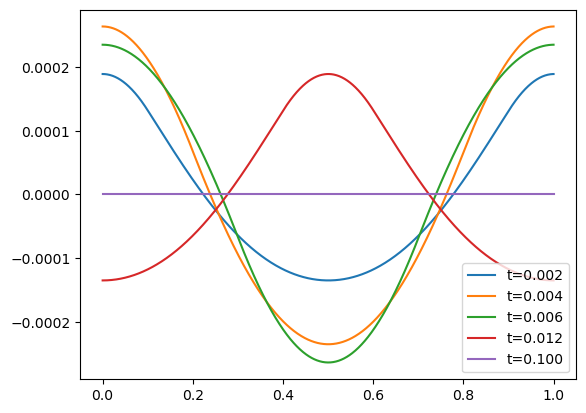

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

def velocity_prof(x):
    L = 1
    d = 0.1
    C = 1
    sigma = 0.3
    return C*(x*(L-x)/L**2)*np.exp(-((x-d)**2) / (2*sigma**2))

L = 1 #m
# a = 0.005 #m
# M = int(L/a)
M = 1000
# h = 10e-6 #s
tmax = 0.1 #s
# N = int(tmax/h)
v = 100 #m/s
N = 100

x = np.linspace(0, L, M)
dx = x[1] - x[0]
t = np.linspace(0, tmax, N)
h = t[1] - t[0]
phi = np.zeros((M, N), float) #zero everywhere at all space for t=0
psi = np.zeros((M, N), float)    # velocity profile everywhere for t=0
psi[:,0] = velocity_prof(x)

    #take fourier transforms
phiFT = np.fft.rfft(phi[:,0]) * 2*dx/M
psiFT = np.fft.rfft(psi[:,0]) * 2*dx/M


# for t in range(N+1):
#     for x in range(M+1):
#         if x == 0 or x == M:
#             phi[x, t] = 0

#         else:
#             for k in range(1, int(M/2)+1):
#                 omega_k = (v*k*np.pi/L)
#                 phi[x, t] += np.sin(k*np.pi*x/L) * (phiFT[k]*np.cos(omega_k*t) +  (psiFT[k]/omega_k)*np.sin(omega_k*t))


    #how to implement boundary conditions on phi(x, t)???
 
times = (0.002, 0.004, 0.006, 0.012, 0.100)
for time in times:
    C = np.zeros((int(M/2)+1))
    for k in range(1, int(M/2)+1):
        omega_k = (v*k*np.pi/L)
        C[k] = np.abs(phiFT[k])*np.cos(omega_k*time) + (np.abs(psiFT[k])/omega_k)*np.sin(omega_k*time)
                     ##^^^^^ this term is 0 anyway for any k 

    phi = np.fft.irfft(C)*0.5*M/dx  #this is now phi(x, t)
    idx = int(time/h)
    plt.plot(x, phi, label='t=%.3f'%time)

plt.legend(loc='best')
plt.show()

#this literally took me 3 hours. I'm not kidding. and I still couldn't figure it out.
# no idea how to make phi have the boundary conditions
# it also doesnt make sense to me how we can hit the string at distance d = 0.1m and it still strictly vibrates in the middle.


# Boundary Value Problem Example: Shooting Method for Projectile Motion

Suppose we want to choose an initial velocity $v_0$ for a projectile, thrown straight upward, to land after a certain elapsed time $t_L = 10$ s, where the projectile obeys Newton's 2nd Law:
$$\frac {d^2 y}{dt^2} = \frac{F(y)}m \quad \Rightarrow \quad \frac{dy}{dt} = v\quad \text{and}\quad \frac{dv}{dt} = \frac{F(y)}{m}.$$
Take the gravitational constant to be $g = 9.81 m/s^2$

## Exercise 2

Write code to integrate the equations, using RK4, from time $t=0$ to $t=t_L$ to find $y$ of the projectile at $t=t_L$. It should be a function of $v_0$. Assume the projectile starts at $y=0$ at $t=0$.

Hint: keep track of both $y$ and $v$. At each timestep of the RK4 algorithm, you need to invoke a function that encodes the change in $y$ and the change in $v$. The number of timesteps should be a parameter that you can set.

In [ ]:
g = 9.81
tL = 10
N = 100

def f(pos):
    y = pos[0]
    v = pos[1]
    fy = v
    fv = -g
    return np.array([fy, fv], float)

def projectile(v0, y0, tf, N):
    timearr = np.linspace(0, tf, N)
    v = np.zeros(N)
    h = timearr[1] - timearr[0] #spacing 
    v[0] = v0

    pos = [y0, v0]
    
    for k in range(len(timearr)):
        m1 = h*f(pos)
        m2 = h*f(pos + 0.5*m1)
        m3 = h*f(pos + 0.5*m2)
        m4 = h*f(pos + m3)
        pos += (1/6)*(m1 + 2*m2 + 2*m3 + m4)

    return pos[0]

print(projectile(20, 0, 3, 100))

#func is a constant -g:     force is -mg / m = -g



15.564738292011057


## Exercise 3

Write code that performs a binary search to find the initial value of velocity, $v_0$, that gives us $y=0$ (with target accuracy 1e-8) at $t = t_L$. Invoke the code from the previous exercise (try 1000 RK4 steps) at each step of the search.

In [45]:
target = 10e-8
N = 1000

#start with possible velocity values and reduce 
v1 = 0.001
v2 = 2000
y1 = projectile(v1, 0, tL, N)
y2 = projectile(v2, 0, tL, N)

while np.abs(y1 - y2) > target:
    v_next = (v1 + v2) / 2
    y_next = projectile(v_next, 0, tL, N)

    if np.sign(y_next) == np.sign(y1):
        v1 = v_next
        y1 = y_next
    elif np.sign(y_next) == np.sign(y2):
        v2 = v_next
        y2 = y_next

vfinal = (v1 + v2) / 2

print(vfinal)

49.09909909806524


# Verlet Method Example: Orbit Calculation

The position $r(x,y)$ of Earth in its orbital plane can be approximately described by: $$\frac{d^2 \mathbf r}{d t^2} = \frac{-G M \mathbf r}{r^3} $$
where $M = 1.9891 \times 10^{30}$ (mass of Sun in kg). You can import $G$ from scipy.constants

In [1]:
from scipy.constants import G

Note, when Earth is at its closest point to the Sun (perihilion):
* its direction of motion is perpendicular to the line between itself and the Sun
* $r = 1.471 \times 10^{11}$ m
* linear velocity $v = 3.0287 \times 10^4$ m/s

## Exercise 4

Write a program to calculate Earth's position using Verlet method, with timestep $h$ = 1 hour, over 5 years. 

You probably want to keep track of $x$ and $y$ separately (similarly $v_x$ and $v_y$), and calculate $r = \sqrt{x^2+y^2}$. 

Define the x, y axes as: Earth starts at perihelion, along x>0, with positive velocity along y axis

## Exercise 5

Plot $y$ vs $x$ over the 5 years. This should draw over an orbit 5 times; the orbit should be slightly, but visibly, non-circular. Make the plot in units of AU = Astronomical Unit = average Earth-Sun distance.

In [1]:
from scipy.constants import au